# Simulation & control of inverted pendulum

## Build cart model

In [1]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [2]:
def cartpend(y, t, u, m, M, L, g, d):

    x, dx, theta, dtheta = y
    Sy = math.sin(theta)
    Cy = math.cos(theta)
    D = m*L*L*(M+m*(1-Cy**2))
    
    y1 = dx
    y2 = (1/D)*(-m**2*L**2*g*Cy*Sy + m*L**2*(m*L*dtheta**2*Sy - d*dx)) + m*L*L*(1/D)*u
    y3 = dtheta
    y4 = (1/D)*((m+M)*m*g*L*Sy - m*L*Cy*(m*L*dtheta**2*Sy - d*dx)) - m*L*Cy*(1/D)*u

    dydt = [y1, y2, y3, y4]

    return dydt





In [3]:
u = 0
m = 1
M = 5
L = 2
g = -9.8
d = 1
y0 = [0, 0, math.pi, .5]
time_span = 10
frames = 30*time_span
t = np.linspace(0, time_span, frames)
y = odeint(cartpend, y0, t, args = (u, m, M, L, g, d))

## Plot result

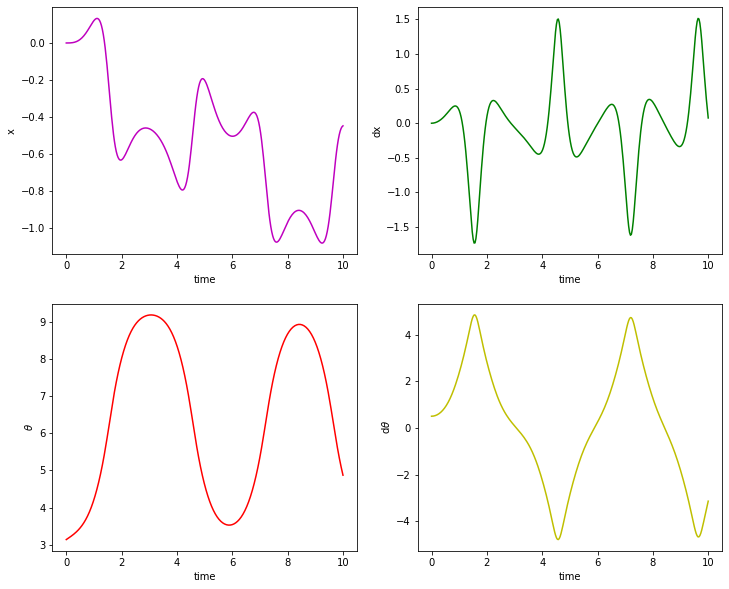

In [4]:
res_x = [row[0] for row in y]
res_dx = [row[1] for row in y]
res_theta = [row[2] for row in y]
res_dtheta = [row[3] for row in y]

plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(t,res_x, 'm')
plt.xlabel('time')
plt.ylabel('x')

plt.subplot(222)
plt.plot(t,res_dx, 'g')
plt.xlabel('time')
plt.ylabel('dx')

plt.subplot(223)
plt.plot(t,res_theta, 'r')
plt.xlabel('time')
plt.ylabel(r'$\theta$')

plt.subplot(224)
plt.plot(t,res_dtheta, 'y')
plt.xlabel('time')
plt.ylabel('d' + r'$\theta$')
plt.show()



## Show animation

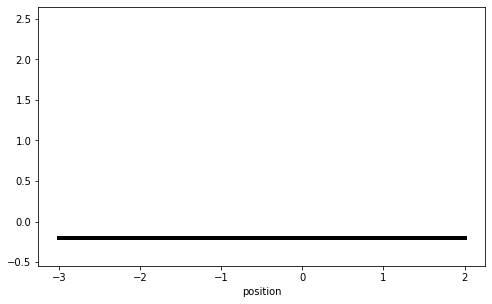

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import rc


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,autoscale_on=False,\
                     xlim=(-3,2),ylim=(-0.4,2.5))
ax.set_xlabel('position')
ax.axis('scaled')

ax.plot([-3,2],[-0.2,-0.2],'k-', lw=4)
mass1, = ax.plot([],[],linestyle='None',marker='s',\
                 markersize=40,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)
mass2, = ax.plot([],[],linestyle='None',marker='o',\
                 markersize=20,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)
line, = ax.plot([],[],'o-',color='orange',lw=4,\
                markersize=6,markeredgecolor='k',\
                markerfacecolor='k')
time_template = 'time = %.1fs'
time_text = ax.text(0.05,0.9,'',transform=ax.transAxes)

def init():
    mass1.set_data([],[])
    mass2.set_data([],[])
    line.set_data([],[])
    time_text.set_text('')
    return line, mass1, mass2, time_text

def animate(i):
    mass1_x = res_x[i]
    mass1_y = -0.1
    mass2_x = res_x[i]-L*math.sin(res_theta[i])
    mass2_y = -L*math.cos(res_theta[i])

    mass1.set_data([mass1_x], [mass1_y])
    mass2.set_data([mass2_x], [mass2_y])

    line.set_data([mass1_x,mass2_x],[mass1_y,mass2_y])
    time_text.set_text(time_template % t[i])
    return line, mass1, mass2, time_text

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,len(t)), \
         interval=40,blit=False,init_func=init)
ani_a.save('Pendulum_Control.mp4',fps=30)



## Add control logic

